<font size="4">

# NATICUSdroid (Android Permissions)

El dataset NATICUSdroid (Android Permissions) es un conjunto de datos orientado a la detección de aplicaciones maliciosas (malware) en el ecosistema Android, utilizando como principal fuente de información los permisos solicitados por las aplicaciones. Cada vez que un usuario instala una aplicación en su dispositivo Android, esta puede solicitar distintos tipos de permisos, como acceso a mensajes SMS, ubicación, micrófono, almacenamiento externo o la cámara. Aunque muchos de estos permisos pueden ser necesarios para el funcionamiento legítimo de la app, en algunos casos los permisos solicitados son excesivos o no se justifican por la funcionalidad ofrecida, lo cual puede ser un indicio de comportamiento malicioso.

El dataset está estructurado de manera que cada fila representa una aplicación Android diferente, mientras que cada columna representa un permiso específico. Los valores suelen ser binarios (por ejemplo, 1 si la app solicita ese permiso, 0 si no). Además, incluye una columna de etiquetado (target) que indica si la app fue clasificada como maliciosa (malware) o benigna (normal), permitiendo que el dataset pueda utilizarse en tareas de clasificación supervisada.

Este conjunto de datos es especialmente útil para aplicar y evaluar algoritmos de machine learning en el ámbito de la ciberseguridad móvil, permitiendo el entrenamiento de modelos que aprendan a distinguir entre apps seguras y peligrosas en función de los permisos que solicitan.

Su uso puede ser muy valioso tanto en entornos académicos como industriales para desarrollar sistemas de detección de malware más eficientes, basados únicamente en la información accesible en el momento de la instalación de una aplicación.

In [81]:
import sys
print(sys.version)


3.10.18 (main, Jun  5 2025, 08:37:47) [Clang 14.0.6 ]


In [82]:
# importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [83]:
# lectura del dataset
dataset = pd.read_csv("data.csv", sep=",")
dataset.head()

android.permission.GET_ACCOUNTS  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   com.sonyericsson.home.permission.BROADCAST_BADGE  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   android.permission.READ_PROFILE  android.permission.MANAGE_ACCOUNTS  \
0                                0                                   0   
1                                0                                   0   
2                                0                                   0   
3                                0                                   0   
4                                0                                   0   

   android.permission.WRITE_SYNC_SETTINGS  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   android.permission.READ_EXTERNAL_STORAGE  android.permission.RECEIVE_SMS  \
0                                         0                               0   
1                                         1                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               0   

   com.android.launcher.permission.READ_SETTINGS  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   android.permission.WRITE_SETTINGS  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   com.google.android.providers.gsf.permission.READ_GSERVICES  ...  \
0                                                  0           ...   
1                                                  0           ...   
2                                                  0           ...   
3                                                  0           ...   
4                                                  0           ...   

   com.android.launcher.permission.UNINSTALL_SHORTCUT  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   com.sec.android.iap.permission.BILLING  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   com.htc.launcher.permission.UPDATE_SHORTCUT  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   com.sec.android.provider.badge.permission.WRITE  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   android.permission.ACCESS_NETWORK_

In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29332 entries, 0 to 29331
Data columns (total 87 columns):
 #   Column                                                                         Non-Null Count  Dtype
---  ------                                                                         --------------  -----
 0   android.permission.GET_ACCOUNTS                                                29332 non-null  int64
 1   com.sonyericsson.home.permission.BROADCAST_BADGE                               29332 non-null  int64
 2   android.permission.READ_PROFILE                                                29332 non-null  int64
 3   android.permission.MANAGE_ACCOUNTS                                             29332 non-null  int64
 4   android.permission.WRITE_SYNC_SETTINGS                                         29332 non-null  int64
 5   android.permission.READ_EXTERNAL_STORAGE                                       29332 non-null  int64
 6   android.permission.RECEIVE_SMS        

In [85]:
# salidas del dataset
dataset["Result"].unique()

array([0, 1])

In [86]:
# cantidad de valores de cada clase del dataset
dataset["Result"].value_counts()

Result
1    14700
0    14632
Name: count, dtype: int64

In [87]:
# tamaño del dataset
dataset.shape

(29332, 87)

In [88]:
# breve descripción del dataset
dataset.describe()

android.permission.GET_ACCOUNTS  \
count                     29332.000000   
mean                          0.226033   
std                           0.418268   
min                           0.000000   
25%                           0.000000   
50%                           0.000000   
75%                           0.000000   
max                           1.000000   

       com.sonyericsson.home.permission.BROADCAST_BADGE  \
count                                      29332.000000   
mean                                           0.034263   
std                                            0.181907   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            0.000000   
max                                            1.000000   

       android.permission.READ_PROFILE  android.permission.MANAGE_ACCOUNTS  \
count                     29332.000000                        29332.000000   
mean                          0.045888                            0.013603   
std                           0.209247                            0.115837   
min                           0.000000                            0.000000   
25%                           0.000000                            0.000000   
50%                           0.000000                            0.000000   
75%                           0.000000                            0.000000   
max                           1.000000                            1.000000   

       android.permission.WRITE_SYNC_SETTINGS  \
count                            29332.000000   
mean                                 0.005762   
std                                  0.075688   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       android.permission.READ_EXTERNAL_STORAGE  \
count                              29332.000000   
mean                                   0.171690   
std                                    0.377117   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                    1.000000   

       android.permission.RECEIVE_SMS  \
count                    29332.000000   
mean                         0.060071   
std                          0.237622   
min                          0.000000   
25%                          0.000000   
50%                          0.000000   
75%                          0.000000   
max                          1.000000   

       com.android.launcher.permission.READ_SETTINGS  \
count                                   29332.000000   
mean                                        0.014114   
std                                         0.117964   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         0.000000   
max                                         1.000000   

       android.permission.WRITE_SETTINGS  \
count                        29332.00000   
mean                             0.11080   
std                              0.31389   
min                              0.00000   
25%                              0.00000   
50%                              0.00000   
75%                              0.00000   
max                              1.00000   

       com.google.android.providers.gsf.permission.READ_GSERVICES  ...  \
count                                       29332.000000           ...   
mean                                            0.043741           ... 

<font size="4">

Tal y como podemos observar, el dataset consta de 30.000 registros de aplicaciones y, de cada aplicación, se han recogido información sobre si, esta, necesita o no permisos. Para ello, se han preguntado por 86 permisos (1 es necesitado, 0 es no necesitado) y, la última columna muestra el resultado, es decir, si se trata de una aplicación maliciosa o no. También, podemos observar que todos los valores del dataset son binarios, es decir, o 0 o 1, incluyendo a la columna resultado. Por otro lado, hay que destacar que no hay valores nulos en este dataset, todos son de tipo entero. Por último, en cuanto a la variable resultado, podemos decir que esta está equilibrada, es decir, la cantidad de valores de 1 y 0 es similar, de manera que no tenemos un desbalanceo en el dataset lo cual no podría haber causado problemas de sobreajuste para una clase y de subajuste para la otra.

## Análisis Exploratorio de Datos (EDA)

Una vez hemos extraído la información principal sobre el dataset, vamos a proceder a entenderlo. Para ello, realizaremos un análisis exploratorio de los datos, en donde, veremos y analizaremos las variables por separado y las relaciones entre estas. De esta manera, es posible que debido a la alta correlación entre dos variables, se podrían eliminar. También mostraremos gráficas sobre la distribución de los datos, aunque en este caso, las variables pueden tomar únicamente dos valores, 0 o 1 y, la columna resultado también será binaria (0 o 1), es decir, o se trata de una aplicación maliciosa o se trata de una aplicación buena.

En primer lugar, vamos a analizar las variables por separado, en donde, vamos a ver como se distribuyen los datos en cada una de las variables del dataset.

In [89]:
# lista de variables
lista_variables = dataset.columns.tolist()

for variable in lista_variables:
    print(variable)
    print(dataset[variable].unique())

android.permission.GET_ACCOUNTS
[0 1]
com.sonyericsson.home.permission.BROADCAST_BADGE
[0 1]
android.permission.READ_PROFILE
[0 1]
android.permission.MANAGE_ACCOUNTS
[0 1]
android.permission.WRITE_SYNC_SETTINGS
[0 1]
android.permission.READ_EXTERNAL_STORAGE
[0 1]
android.permission.RECEIVE_SMS
[0 1]
com.android.launcher.permission.READ_SETTINGS
[0 1]
android.permission.WRITE_SETTINGS
[0 1]
com.google.android.providers.gsf.permission.READ_GSERVICES
[0 1]
android.permission.DOWNLOAD_WITHOUT_NOTIFICATION
[0 1]
android.permission.GET_TASKS
[0 1]
android.permission.WRITE_EXTERNAL_STORAGE
[0 1]
android.permission.RECORD_AUDIO
[0 1]
com.huawei.android.launcher.permission.CHANGE_BADGE
[0 1]
com.oppo.launcher.permission.READ_SETTINGS
[0 1]
android.permission.CHANGE_NETWORK_STATE
[0 1]
com.android.launcher.permission.INSTALL_SHORTCUT
[0 1]
android.permission.android.permission.READ_PHONE_STATE
[0 1]
android.permission.CALL_PHONE
[0 1]
android.permission.WRITE_CONTACTS
[0 1]
android.permission.RE

android.permission.GET_ACCOUNTS:
android.permission.GET_ACCOUNTS
0    22702
1     6630
Name: count, dtype: int64
******************************
com.sonyericsson.home.permission.BROADCAST_BADGE:
com.sonyericsson.home.permission.BROADCAST_BADGE
0    28327
1     1005
Name: count, dtype: int64
******************************
android.permission.READ_PROFILE:
android.permission.READ_PROFILE
0    27986
1     1346
Name: count, dtype: int64
******************************
android.permission.MANAGE_ACCOUNTS:
android.permission.MANAGE_ACCOUNTS
0    28933
1      399
Name: count, dtype: int64
******************************
android.permission.WRITE_SYNC_SETTINGS:
android.permission.WRITE_SYNC_SETTINGS
0    29163
1      169
Name: count, dtype: int64
******************************
android.permission.READ_EXTERNAL_STORAGE:
android.permission.READ_EXTERNAL_STORAGE
0    24296
1     5036
Name: count, dtype: int64
******************************
android.permission.RECEIVE_SMS:
android.permission.RECEIVE_SMS
0

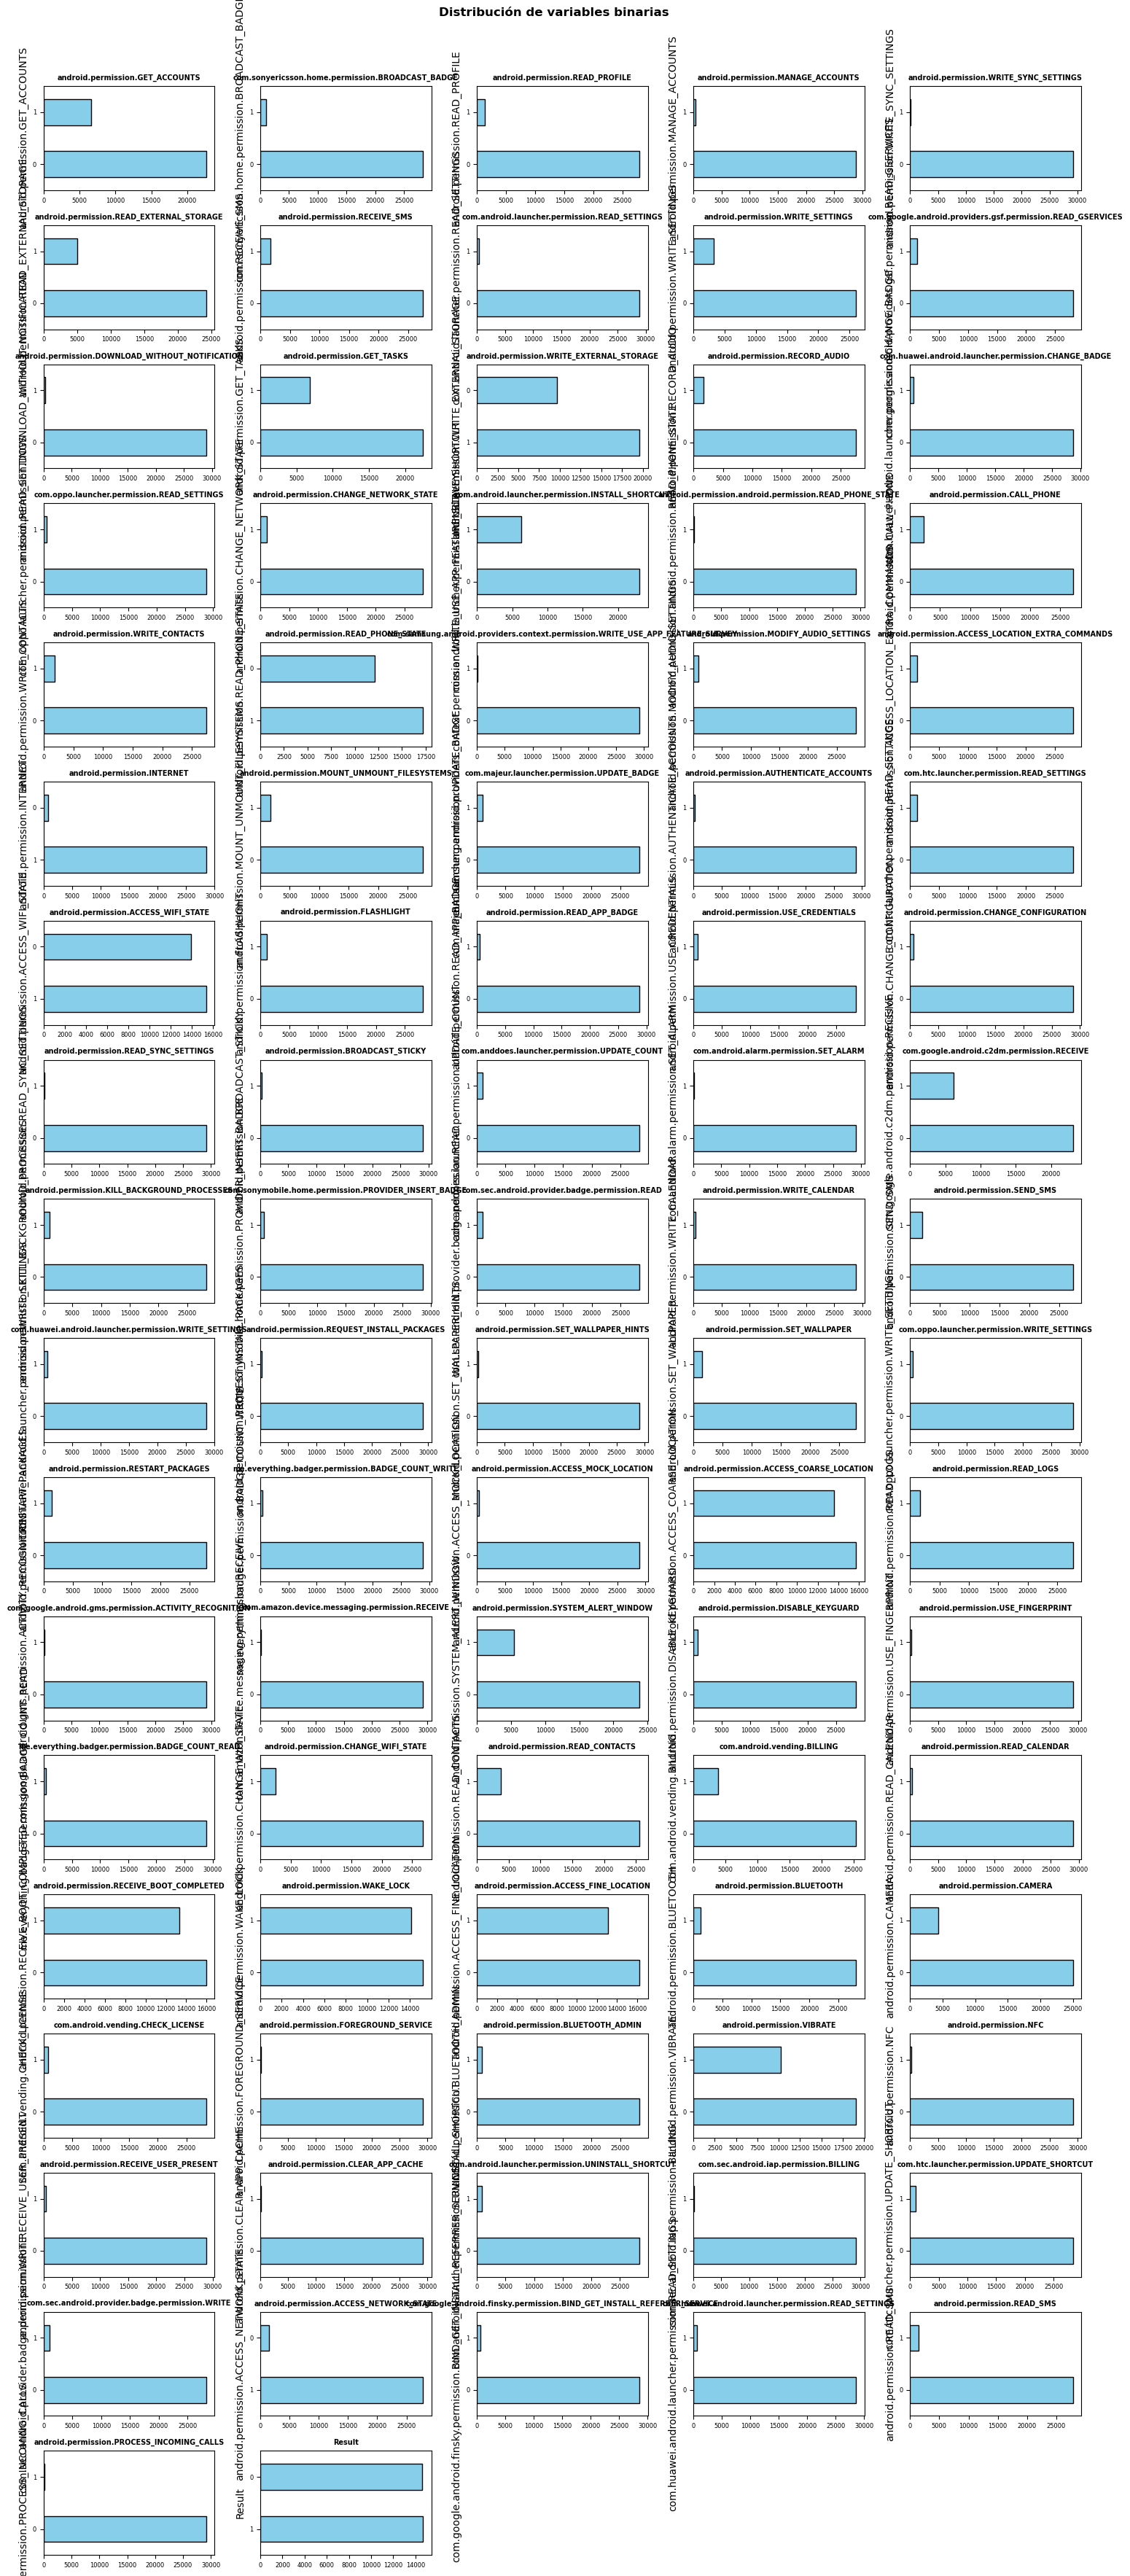

In [90]:
n = len(lista_variables)
filas = int(np.ceil(n / 5))  # 5 columnas por fila (ajustable)

fig, axes = plt.subplots(nrows=filas, ncols=5, figsize=(15, filas * 2))
axes = axes.flat

for i, colum in enumerate(lista_variables):
    dataset[colum].value_counts().plot.barh(ax=axes[i], color="skyblue", edgecolor="black")
    axes[i].set_title(colum, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")

# Ocultamos los ejes que sobren
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.subplots_adjust(top=0.95)
fig.suptitle('Distribución de variables binarias',
             fontsize=12, fontweight="bold")

# Imprimimos los conteos ordenados por categoría
for columna in lista_variables:
    print(f"{columna}:\n{dataset[columna].value_counts().sort_index()}")
    print("*" * 30)

<font size="4">

Tal y como podemos observar, en muchas variables tenemos un gran desequilibrio mientras que, en la variable resultado presentamos un gran equilibrio en cuanto a los posibles valores.

In [91]:
# vemos la proporcion de cada valor de cada variable
for col in lista_variables:
    counts = dataset[col].value_counts(normalize=True)
    print(f"{col}:")
    print(counts)
    print(f"Desequilibrio: {abs(counts.iloc[0] - counts.iloc[1]):.2f}")
    print("-" * 30)

android.permission.GET_ACCOUNTS:
android.permission.GET_ACCOUNTS
0    0.773967
1    0.226033
Name: proportion, dtype: float64
Desequilibrio: 0.55
------------------------------
com.sonyericsson.home.permission.BROADCAST_BADGE:
com.sonyericsson.home.permission.BROADCAST_BADGE
0    0.965737
1    0.034263
Name: proportion, dtype: float64
Desequilibrio: 0.93
------------------------------
android.permission.READ_PROFILE:
android.permission.READ_PROFILE
0    0.954112
1    0.045888
Name: proportion, dtype: float64
Desequilibrio: 0.91
------------------------------
android.permission.MANAGE_ACCOUNTS:
android.permission.MANAGE_ACCOUNTS
0    0.986397
1    0.013603
Name: proportion, dtype: float64
Desequilibrio: 0.97
------------------------------
android.permission.WRITE_SYNC_SETTINGS:
android.permission.WRITE_SYNC_SETTINGS
0    0.994238
1    0.005762
Name: proportion, dtype: float64
Desequilibrio: 0.99
------------------------------
android.permission.READ_EXTERNAL_STORAGE:
android.permission.

<font size="4">

Una vez analizamos las variables de manera individual, viendo las distintas distribuciones en cada una de elloas. vamos a analizar la relación de todas las variables entre si. Emplearemos dos métodos para ver como se relacionan las variables entre sí y como de importante es cada variable para la variable objetivo, es decir, vamos a mirar con cual de las variables predictoras, la incertidumbre de elegir una clase u otra en la variable objetivo es menor.

Por un lado, calcularemos la matriz de correlación y, para ello, seguiremos el esquema de esta tabla:

| Tipo de correlación                    | Modelos lineales                 | Árboles / Random Forest / XGBoost                   |
| -------------------------------------- | -------------------------------- | --------------------------------------------------- |
| Alta correlación entre predictores     | Eliminar, regularizar o usar PCA | No crítico, pero puede simplificar el modelo        |
| Baja correlación con variable objetivo | Eliminar                         | Analizar más a fondo, puede aportar valor no lineal |
| Moderada-alta correlación con objetivo | Mantener                         | Mantener                                            |

En el código de a continuación, se genera la matriz de correlación utilizando un mapa de calor. En él, podemos ver como de relacionadas están las variables entre sí. Valores cercanos a 1 y a -1 significa que esas dos variables están muy relacionadas entre sí, en cambio, valores cercanos a 0, significa que las variables no están relacionadas entre sí, lo cual puede ser positivo o no, dependiendo de si las dos variables son predictoras o, una predictora y la otra objetivo.

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
# calculamos la matriz de correlación

dataset_num = dataset.select_dtypes(include=['int64', 'float64'])
corr_matrix = dataset_num.corr()

print(corr_matrix)

plt.figure(figsize=(100, 80))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

                                                    android.permission.GET_ACCOUNTS  \
android.permission.GET_ACCOUNTS                                            1.000000   
com.sonyericsson.home.permission.BROADCAST_BADGE                          -0.013964   
android.permission.READ_PROFILE                                           -0.079951   
android.permission.MANAGE_ACCOUNTS                                         0.196896   
android.permission.WRITE_SYNC_SETTINGS                                     0.096710   
...                                                                             ...   
com.google.android.finsky.permission.BIND_GET_I...                        -0.016237   
com.huawei.android.launcher.permission.READ_SET...                        -0.031852   
android.permission.READ_SMS                                               -0.011002   
android.permission.PROCESS_INCOMING_CALLS                                  0.110615   
Result                                     

<font size="4">

Otro método que vamos a usar es el de la **Información Mutua**, que consiste en medir cuánto saber el valor de una variable (X[i]) reduce la incertidumbre sobre la variable objetivo (y):
- Si una variable tiene alta información mutua, significa que tiene fuerte relación con la clase (malicious o benign).
- Si tiene cero, quiere decir que no aporta nada útil para predecir la clase.

In [93]:
from sklearn.feature_selection import mutual_info_classif

lista_variables = [col for col in lista_variables if col != "Result"]

X = dataset[lista_variables]
y = dataset["Result"]

mi = mutual_info_classif(X, y, discrete_features=True)
mi_scores = pd.Series(mi, index=lista_variables).sort_values(ascending=False)

print("Variables importantes, de más a menos:")
mi_scores

Variables importantes, de más a menos:


android.permission.READ_PHONE_STATE                 0.299413
com.google.android.c2dm.permission.RECEIVE          0.142117
android.permission.RECEIVE_BOOT_COMPLETED           0.130402
com.android.launcher.permission.INSTALL_SHORTCUT    0.117545
android.permission.ACCESS_COARSE_LOCATION           0.096175
                                                      ...   
android.permission.MODIFY_AUDIO_SETTINGS            0.000054
android.permission.RECEIVE_USER_PRESENT             0.000044
android.permission.SET_WALLPAPER_HINTS              0.000036
android.permission.ACCESS_MOCK_LOCATION             0.000026
android.permission.FLASHLIGHT                       0.000024
Length: 86, dtype: float64

<font size="4">

Para este dataset, viendo los resultados obtenidos de la matriz de correlación y del proceso de información mutua, podríamos sacar las siguientes conclusiones:
- Matriz de correlación: podríamos eliminar columnas que presentan una correlación por encima de 0.5 y por debajo de 0.5.
- Información mutua: podríamos considerar como umbral = 0.0001 y todo lo que está por debajo de esta, eliminarlo, ya que significa que esa columna no es útil para la predicción.

Viendo estos resultados y teniendo en cuenta el dataset, se ha decidido no eliminar ninguna columna ya que, al tratarse de permisos solicitados, se han considerado como independientes, por lo tanto, se procede a mantener todo el dataset. Sin embargo, si al comprobar las métricas, los resultados son malos, procederemos a ir elimando columnas para obtener una mejor precisión.

## Modelos y métricas

Pasamos directamente a la definición del modelo, ya que para este dataset, no sería necesario realizar ningún preprocesamiento. Esto se debe a que no es necesario transformar ninguna variable del dataset debido a que todas son de tipo binario.

En cuanto a los modelos que vamos a emplear, usaremos estos dos:
- Algoritmo de Random Forest
- Support Vector Machine (SVM)

In [94]:
# Dividimos el dataset en conjunto entrenamiento y en conjunto test
from sklearn.model_selection import train_test_split, cross_val_score

x_input = dataset.drop(["Result"], axis=1)
y_input = dataset["Result"]

x_train, x_test, y_train, y_test = train_test_split(x_input, y_input, test_size=0.2, random_state=42, stratify=y_input)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((23465, 86), (5867, 86), (23465,), (5867,))

<font size="4">

El algoritmo de **Random Forest** es un método de aprendizaje automático supervisado que se basa en la combinación de múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste. Funciona creando un conjunto de árboles (un "bosque"), cada uno entrenado con una muestra aleatoria del conjunto de datos (con reemplazo, técnica conocida como *bootstrap*) y, en cada nodo del árbol, seleccionando aleatoriamente un subconjunto de características para decidir la mejor división. En clasificación, cada árbol vota por una clase y se elige la clase con más votos; en regresión, se promedian los resultados. Esta aleatoriedad y el uso de múltiples modelos ayudan a que Random Forest sea robusto, preciso y menos sensible al ruido o a datos atípicos.


In [95]:
# algoritmo de random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# definimos el modelo
modelo_RF = RandomForestClassifier(n_estimators=20, random_state=42)
# entrenamos el modelo
modelo_RF.fit(x_train, y_train)
# calculamos la prediccion del conjunto test
y_pred = modelo_RF.predict(x_test)

Accuracy: 0.9703425941707857
Precision: 0.9703992835934507
Recall: 0.9703425941707857
F1 Score: 0.9703420703181691

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2927
           1       0.98      0.96      0.97      2940

    accuracy                           0.97      5867
   macro avg       0.97      0.97      0.97      5867
weighted avg       0.97      0.97      0.97      5867

Confusion matrix:
 [[2856   71]
 [ 103 2837]]


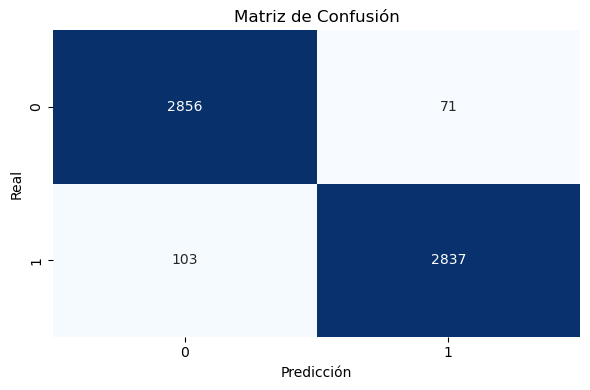

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular métricas
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Usa 'macro' o 'binary' según el caso
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
matriz_conf = confusion_matrix(y_test, y_pred)

# Mostrar resultados
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Calcular matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", matriz_conf)

# Graficarla
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()


<font size="4">

Un **Support Vector Machine (SVM)** es un algoritmo de clasificación que busca encontrar el hiperplano que mejor separa dos clases maximizando la distancia (margen) entre los datos más cercanos de cada clase, llamados vectores soporte. Si los datos no son linealmente separables, SVM utiliza funciones kernel para transformarlos a un espacio de mayor dimensión donde sí se pueden separar linealmente. Esto lo hace muy efectivo para problemas complejos en espacios de alta dimensión.

In [97]:
from sklearn.svm import SVC

# definimos el modelo SVM
svm = SVC(kernel='rbf', C=0.5, gamma=0.1)
# entrenamos el modelo
svm.fit(x_train, y_train)
# calculamos la prediccion
y_pred = svm.predict(x_test)

Accuracy: 0.9613090165331515
Precision: 0.9613090409153363
Recall: 0.9613090165331515
F1 Score: 0.9613090007966532

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2927
           1       0.96      0.96      0.96      2940

    accuracy                           0.96      5867
   macro avg       0.96      0.96      0.96      5867
weighted avg       0.96      0.96      0.96      5867

Confusion matrix:
 [[2813  114]
 [ 113 2827]]


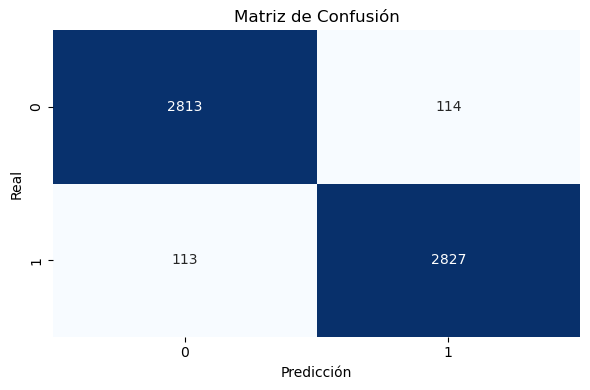

In [98]:
# calculamos las metricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular métricas
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Usa 'macro' o 'binary' según el caso
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
matriz_conf = confusion_matrix(y_test, y_pred)

# Mostrar resultados
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Calcular matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", matriz_conf)

# Graficarla
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()
